In [21]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
tatanic_df = pd.read_csv('/Users/seojeongsig/Desktop/VSC/titanic/train.csv')

In [23]:
tatanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 숫자
    - Age, SibSp, Parch, Fare
- 범주형
    - Pclass, Sex, Carbin, Embarked

- x변수 1개, Y변수(Survived)

In [24]:
tatanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
#x변수 : Fare, Y변수 : Survived
X_1 = tatanic_df[['Fare']]
y_true = tatanic_df[['Survived']]

<Axes: xlabel='Fare', ylabel='Survived'>

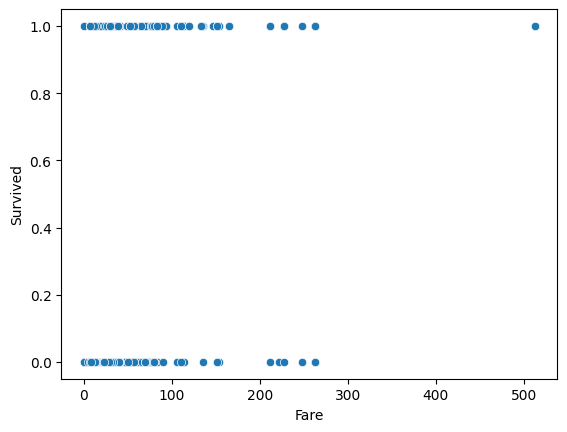

In [26]:
sns.scatterplot(tatanic_df, x= 'Fare', y= 'Survived')

<Axes: xlabel='Fare', ylabel='Count'>

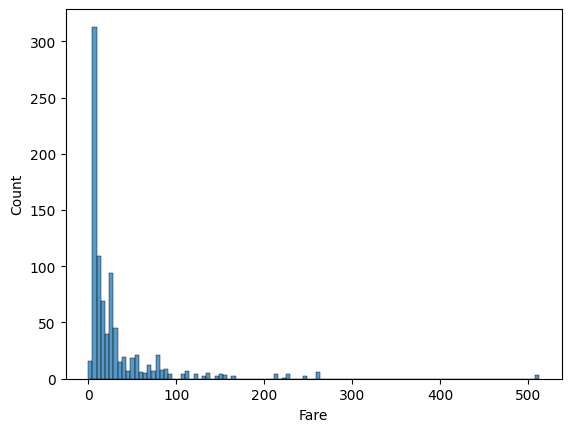

In [27]:
sns.histplot(tatanic_df, x = 'Fare')

In [28]:
# 데이터 기술통계를 보는 법(수치형) describe()
tatanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
from sklearn.linear_model import LogisticRegression
model_lor = LogisticRegression()

model_lor = LogisticRegression()
model_lor.fit(X_1, y_true)


/Users/seojeongsig/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
def get_att(x):
    #x모델을 넣기
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_features_in_)
    print('들어간 독립변수(x)의 이름', x.feature_names_in_)
    print('가중치', x.coef_)
    print('바이어스', x.intercept_)

In [34]:
get_att(model_lor)

클래스 종류 [0 1]
독립변수 갯수 1
들어간 독립변수(x)의 이름 ['Fare']
가중치 [[0.01519617]]
바이어스 [-0.94129222]


In [35]:
from sklearn.metrics import accuracy_score, f1_score

def get_metrics(true, pred):
    print('정확도', accuracy_score(true, pred))
    print('f1-score', f1_score(true, pred))

In [39]:
y_pred_1 = model_lor.predict(X_1)
len(y_pred_1)

891

In [40]:
get_metrics(y_true, y_pred_1)

정확도 0.6655443322109988
f1-score 0.354978354978355


# 다중 로지스틱 회귀
- 숫자
    - Age, SibSp, Parch, Fare
- 범주형
    - Pclass, Sex, Carbin, Embarked

- x변수 1개, Y변수(Survived)

In [41]:
tatanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Y(Sutvived) : 사망
# X(수치형) : Fare
# X(범주형) : Pclass(좌석등급), Sex

In [43]:
def get_sex(x):
    if x == 'female':
        return 0
    else:
        return 1
tatanic_df['Sex_en'] = tatanic_df['Sex'].apply(get_sex)

In [44]:
tatanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_en
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [45]:
X_2 = tatanic_df[['Pclass', 'Sex_en', 'Fare']]
y_true = tatanic_df[['Survived']]
model_lor_2 = LogisticRegression()
model_lor_2.fit(X_2, y_true)


/Users/seojeongsig/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
get_att(model_lor_2)

클래스 종류 [0 1]
독립변수 갯수 3
들어간 독립변수(x)의 이름 ['Pclass' 'Sex_en' 'Fare']
가중치 [[-8.88331324e-01 -2.53993425e+00  1.64019087e-03]]
바이어스 [3.02004403]


In [49]:
y_pred_2 = model_lor_2.predict(X_2)
y_pred_2[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [50]:
y_pred_1[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
#x변수가 Fare
get_metrics(y_true, y_pred_1)

# x변수가 Fare, Pclass, Sex
get_metrics(y_true, y_pred_2)

정확도 0.6655443322109988
f1-score 0.354978354978355
정확도 0.7867564534231201
f1-score 0.7121212121212122


In [55]:
# 각 데이터별 Y = 1인 확률(생존할 확률) 뽑아보기
model_lor_2.predict_proba(X_2) 

array([[0.8977979 , 0.1022021 ],
       [0.09546762, 0.90453238],
       [0.40901264, 0.59098736],
       ...,
       [0.40287202, 0.59712798],
       [0.58880217, 0.41119783],
       [0.89772263, 0.10227737]])